In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt_path = r'C:\Users\basti\OneDrive\Dokumente\Anna\plots'

In [12]:
column_names =  []
for i in 'ABCDEFGHIJKLM':
    for j in '1234':
        column_names.append(i+j)
print(column_names)
data = np.loadtxt(r'C:\Users\basti\OneDrive\Dokumente\Anna\Brodworschd_international.txt',delimiter=',')
df = pd.DataFrame(data,columns=column_names)

wurstnamen=[r'Frankische Bratwurst','Die Klana',r'Bärlauch-Bratwurst','Brooklyn Herbs&Spices','Whiskey-Honig-Bratwurst','Diots aux Oignons','Smokey-Burger-Bratwurst','Guinness-Bratwurst','Paio Brasiliano','Rindsbratwurst','Sichoang','Boerewors','Kolda´sz']
column_names_whole = [f'{i}5' for i in 'ABCDEFGHIJKLM']

whole_array = []
for i in range(13):
    col = np.sum(data[:,i*4:(i+1)*4],axis=1)
    whole_array.append(col)
whole_array = np.array(whole_array)
print(whole_array.shape, column_names_whole)
whole_array = pd.DataFrame(whole_array.T,columns=column_names_whole)
#print(whole_array)

['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1', 'E2', 'E3', 'E4', 'F1', 'F2', 'F3', 'F4', 'G1', 'G2', 'G3', 'G4', 'H1', 'H2', 'H3', 'H4', 'I1', 'I2', 'I3', 'I4', 'J1', 'J2', 'J3', 'J4', 'K1', 'K2', 'K3', 'K4', 'L1', 'L2', 'L3', 'L4', 'M1', 'M2', 'M3', 'M4']
(13, 25) ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5', 'J5', 'K5', 'L5', 'M5']


(array([96.,  0.,  0.,  4.,  6.,  8.,  2., 15., 16.,  9., 11., 16., 26.,
         9., 24., 18., 16., 11.,  5.,  4., 25.,  1.,  0.,  0.,  2.,  0.,
         0.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28.]),
 <BarContainer object of 28 artists>)

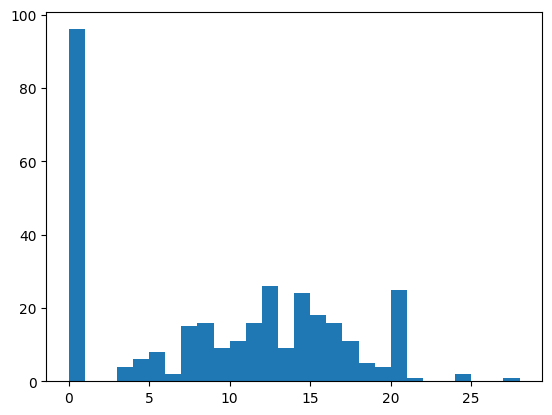

In [13]:
plt.figure()
plt.hist(whole_array.values.flatten(),bins=28)

In [22]:
orginalitaet = []
optik = []
geschmack = []
konsistenz = []

for i, name in zip(range(0, df.shape[1], 4), wurstnamen):
    print(name)
    group = df.iloc[:, i:i + 4] 
    fig, axes= plt.subplots(2,2)
    fig.subplots_adjust(hspace=0.3)
    (ax0,ax1),(ax2,ax3) = axes
    fig.text(0.5,0.9,name,ha='center', fontdict={'size':14})
    ax0.hist(group.values[:,0],bins=np.arange(-0.5,7.5),rwidth=0.9, color = 'C0',label='Verteilung')
    red=group.values[:,0][group.values[:,0]>0]
    mean0 = np.mean(red)
    err0 = np.std(red)
    ax0.errorbar(mean0,1,xerr=err0,color='black',marker='o',label='Mittel')
    ax0.set_xlabel(r'Originalität Wertung')
    ax0.legend()
    ax1.hist(group.values[:,1],bins=np.arange(-0.5,7.5),rwidth=0.9, color = 'C1',label='Verteilung')
    red=group.values[:,1][group.values[:,1]>0]
    mean1 = np.mean(red)
    err1 = np.std(red)
    ax1.errorbar(mean1,1,xerr=err1,color='black',marker='o',label='Mittel')
    ax1.set_xlabel(r'Optik Wertung')
    ax1.legend()
    ax2.hist(group.values[:,2],bins=np.arange(-0.5,7.5),rwidth=0.9, color = 'C2',label='Verteilung')
    red=group.values[:,2][group.values[:,2]>0]
    mean2 = np.mean(red)
    err2 = np.std(red)
    ax2.errorbar(mean2,1,xerr=err2,color='black',marker='o',label='Mittel')
    ax2.set_xlabel(r'Geschmack Wertung')
    ax2.legend()
    ax3.hist(group.values[:,3],bins=np.arange(-0.5,7.5),rwidth=0.9, color = 'C3',label='Verteilung')
    red=group.values[:,3][group.values[:,3]>0]
    mean3 = np.mean(red)
    err3 = np.std(red)
    ax3.errorbar(mean3,1,xerr=err3,color='black',marker='o',label='Mittel')
    ax3.set_xlabel(r'Konsistenz Wertung')
    ax3.legend()
    orginalitaet.append((mean0,err0))
    optik.append((mean1,err1))
    geschmack.append((mean2,err2))
    konsistenz.append((mean3,err3))
    fig.savefig(f'{plt_path}/{name}.png', bbox_inches = 'tight')
    plt.close()
    #break


Frankische Bratwurst
Die Klana
Bärlauch-Bratwurst
Brooklyn Herbs&Spices
Whiskey-Honig-Bratwurst
Diots aux Oignons
Smokey-Burger-Bratwurst
Guinness-Bratwurst
Paio Brasiliano
Rindsbratwurst
Sichoang
Boerewors
Kolda´sz


In [24]:
orginalitaet = np.array(orginalitaet)
optik = np.array(optik)
geschmack = np.array(geschmack)
konsistenz = np.array(konsistenz)
overall = (orginalitaet[:,0]+optik[:,0]+geschmack[:,0]+konsistenz[:,0])/4
overall_err = (orginalitaet[:,1]+optik[:,1]+geschmack[:,1]+konsistenz[:,1])/4

max_value = [np.max(orginalitaet[:,0]),np.max(optik[:,0]),np.max(geschmack[:,0]),np.max(konsistenz[:,0])]
max_index = [np.argmax(orginalitaet[:,0]),np.argmax(optik[:,0]),np.argmax(geschmack[:,0]),np.argmax(konsistenz[:,0])]
min_value = [np.min(orginalitaet[:,0]),np.min(optik[:,0]),np.min(geschmack[:,0]),np.min(konsistenz[:,0])]
min_index = [np.argmin(orginalitaet[:,0]),np.argmin(optik[:,0]),np.argmin(geschmack[:,0]),np.argmin(konsistenz[:,0])]
best_inter_value = [np.max(orginalitaet[2:,0]),np.max(optik[2:,0]),np.max(geschmack[2:,0]),np.max(konsistenz[2:,0])]
best_inter_index = [np.argmax(orginalitaet[2:,0]),np.argmax(optik[2:,0]),np.argmax(geschmack[2:,0]),np.argmax(konsistenz[2:,0])]
print(max_index)
print(best_inter_index)
print(min_index)

[0, 0, 0, 0]
[2, 9, 5, 9]
[2, 10, 10, 10]


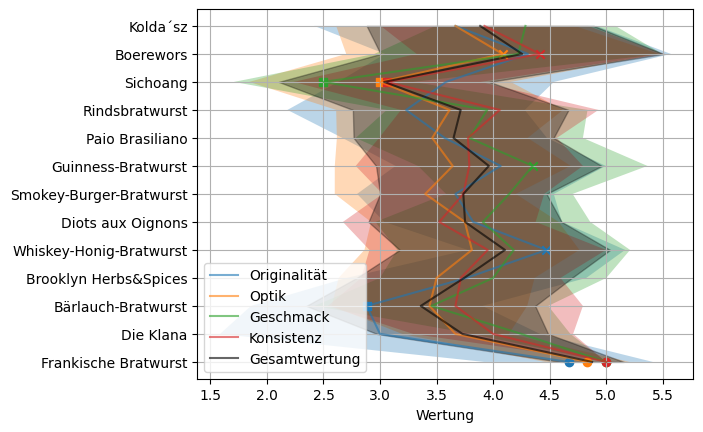

In [16]:
plt.plot(orginalitaet[:,0],wurstnamen,label='Originalität',alpha=0.6)
plt.fill_betweenx(wurstnamen,orginalitaet[:,0]-orginalitaet[:,1],orginalitaet[:,0]+orginalitaet[:,1],alpha=0.3)
plt.plot(optik[:,0],wurstnamen,label='Optik',alpha=0.6)
plt.fill_betweenx(wurstnamen,optik[:,0]-optik[:,1],optik[:,0]+optik[:,1],alpha=0.3)
plt.plot(geschmack[:,0],wurstnamen,label='Geschmack',alpha=0.6)
plt.fill_betweenx(wurstnamen,geschmack[:,0]-geschmack[:,1],geschmack[:,0]+geschmack[:,1],alpha=0.3)
plt.plot(konsistenz[:,0],wurstnamen,label='Konsistenz',alpha=0.6)
plt.fill_betweenx(wurstnamen,konsistenz[:,0]-konsistenz[:,1],konsistenz[:,0]+konsistenz[:,1],alpha=0.3)
plt.plot(overall,wurstnamen,label='Gesamtwertung',alpha=0.6,color='black')
plt.fill_betweenx(wurstnamen,overall-overall_err,overall+overall_err,alpha=0.3,color='black')

for n in range(4):
    plt.scatter(max_value[n],wurstnamen[max_index[n]],color=f'C{n}')
    plt.scatter(min_value[n],wurstnamen[min_index[n]],color=f'C{n}',marker='s')
    plt.scatter(best_inter_value[n],wurstnamen[best_inter_index[n]+2],color=f'C{n}',marker='x')

plt.legend()
plt.xlabel('Wertung')
plt.grid()

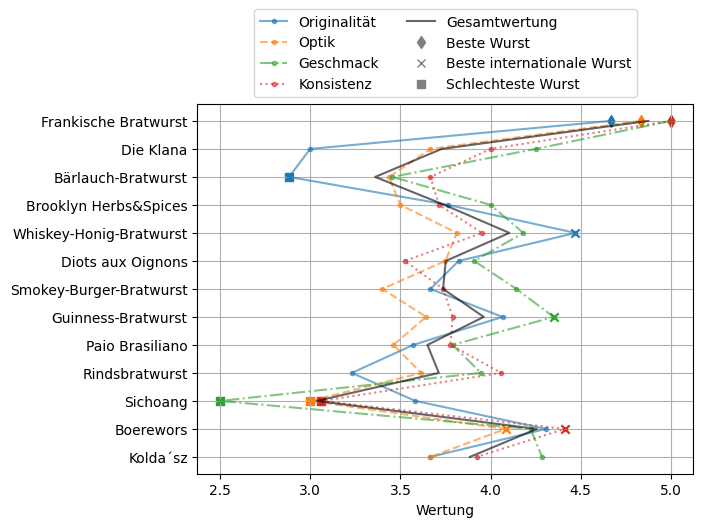

In [19]:
plt.plot(orginalitaet[:,0],wurstnamen,label='Originalität',alpha=0.6,marker='.',ls='-')
plt.plot(optik[:,0],wurstnamen,label='Optik',alpha=0.6,marker='.',ls='--')#,ls='--'
plt.plot(geschmack[:,0],wurstnamen,label='Geschmack',alpha=0.6,marker='.',ls='-.')#,ls='-.'
plt.plot(konsistenz[:,0],wurstnamen,label='Konsistenz',alpha=0.6,marker='.',ls=':')#,ls=':'
plt.plot(overall,wurstnamen,label='Gesamtwertung',alpha=0.6,color='black')

for n in range(4):
    plt.scatter(max_value[n],wurstnamen[max_index[n]],color=f'C{n}',marker='d')
    plt.scatter(min_value[n],wurstnamen[min_index[n]],color=f'C{n}',marker='s')
    plt.scatter(best_inter_value[n],wurstnamen[best_inter_index[n]+2],color=f'C{n}',marker='x')

custom_legend_handles = [
    plt.Line2D([0], [0], marker='d', color='grey', ls=' ', label='Beste Wurst'),
    plt.Line2D([0], [0], marker='x', color='grey', ls=' ', label='Beste internationale Wurst'),
    plt.Line2D([0], [0], marker='s', color='grey', ls=' ', label='Schlechteste Wurst')
]
handles, labels = plt.gca().get_legend_handles_labels()

# Combine custom legend handles with normal labels
combined_handles = handles+custom_legend_handles
combined_labels = labels+[handle.get_label() for handle in custom_legend_handles]

# Add the legend to the plot
plt.legend(combined_handles, combined_labels, loc='lower center',bbox_to_anchor=(0.5,1),ncols=2)
plt.gca().invert_yaxis()
plt.xlabel('Wertung')
plt.grid()
plt.savefig(f'{plt_path}/together.png', bbox_inches = 'tight')
plt.show()